In [341]:
# import packages that we will use
import pandas as pd
import numpy as np
import seaborn as sns
import psycopg2

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

import pymongo
import pandas as pd
from pymongo import MongoClient

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
import pandas.io.sql as sqlio

try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "172.20.63.221",
    port = "5432",
    database = "postgres")
    dbConnection.set_isolation_level(0)# AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    #dbCursor.execute('select * from meat_data')
    sql="select * from meat_data"
    #sql1= insert()
    meat_data=sqlio.read_sql_query(sql,dbConnection)
    df = pd.DataFrame(data=meat_data)
    #dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
    
df.head()

,id,year,area,area_code,element,bovine,pigmeat,poultry,mutton_goat,other_meat,meat_tot
0,175,1961,Algeria,4,Export Quantity,0,0,0,0,0,0
1,176,1961,Algeria,4,Import Quantity,24,16,7,2,0,49
2,177,1961,Algeria,4,Production,23,0,14,40,6,83
3,178,1962,Algeria,4,Export Quantity,0,0,0,0,0,0
4,179,1962,Algeria,4,Import Quantity,18,7,4,1,0,30


In [342]:
#print('Pandas version ' + pd.__version__)
#pip install pandas --upgrade

In [343]:
#import numpy as np
#a = df.groupby('area').nunique()
#b=a[a].index.tolist()

In [344]:
#we can separate in 2 tables the data relative to the continents and that reletesd to countries

dbCursor = dbConnection.cursor()
#dbCursor.execute('select * from meat_data')
sql="select * from meat_data where Area='Africa' or Area='Asia' or Area='Americas' or Area='Central America' or Area='Central Asia' or Area='Eastern Africa' or Area='Eastern Asia'" \
+ "or Area='Eastern Europe' or Area='Europe' or Area='Land Locked Developing Countries' or Area='Least Developed Countries'" \
+ "or Area= 'Low Income Food Deficit Countries' or Area= 'Net Food Importing Developing Countries' or Area='Northern Africa' or Area='Northern America'or Area='Northern Europe'" \
+ "or Area= 'Oceania' or Area= 'South America' or Area= 'Southern Africa' or Area='Southern Asia' or Area= 'Southern Europe' or Area=  'Western Africa' or Area= 'Western Asia' or Area=  'Western Europe' or Area= 'World'"
#sql1= insert()
dataC=sqlio.read_sql_query(sql,dbConnection)
dbCursor.close()
#df = pd.DataFrame(data=dataC)
#df.drop.columns("id")
dataC.head
len(dataC)

0

In [345]:
dbCursor = dbConnection.cursor()
dbCursor.execute('DROP TABLE meat_data_Continent')
#dbCursor.execute('DROP TABLE meatdata')
dbCursor.execute('CREATE TABLE meat_data_continent (id SERIAL PRIMARY KEY, year VARCHAR(50) NOT NULL, area VARCHAR(50) NOT NULL,area_code VARCHAR(50) NOT NULL, element VARCHAR(100) NOT NULL, bovine INTEGER NOT NULL, pigmeat INTEGER NOT NULL, poultry INTEGER NOT NULL,mutton_goat INTEGER NOT NULL,other_meat INTEGER NOT NULL,meat_tot INTEGER NOT NULL)' )
dbCursor.execute("INSERT INTO meat_data_Continent (select * from meat_data where Area='Africa' or Area='Asia' or Area='Americas' or Area='Central America' or Area='Central Asia' or Area='Eastern Africa' or Area='Eastern Asia'" \
+ "or Area='Eastern Europe' or Area='Europe' or Area='Land Locked Developing Countries' or Area='Least Developed Countries'" \
+ "or Area= 'Low Income Food Deficit Countries' or Area= 'Net Food Importing Developing Countries' or Area='Northern Africa' or Area='Northern America'or Area='Northern Europe'" \
+ "or Area= 'Oceania' or Area= 'South America' or Area= 'Southern Africa' or Area='Southern Asia' or Area= 'Southern Europe' or Area=  'Western Africa' or Area= 'Western Asia' or Area=  'Western Europe' or Area= 'World')" )
                 
dbCursor.close()

In [346]:
dbCursor = dbConnection.cursor()
#dbCursor.execute('select * from meat_data')
sql="select * from meat_data_Continent"
dataC=sqlio.read_sql_query(sql,dbConnection)
dbCursor.close()
dataC.head
len(dataC)

0

In [360]:
dbCursor = dbConnection.cursor()
dbCursor.execute("DELETE from meat_data where Area='Africa' or Area='Americas' or Area='Asia' or Area='Central America'  or Area='Central Asia'or Area='China, mainland' or Area='Eastern Africa' or Area='Eastern Asia'" \
+ "or Area='Eastern Europe' or Area='Europe' or Area='Land Locked Developing Countries' or Area='Least Developed Countries'" \
+ "or Area= 'Low Income Food Deficit Countries' or Area= 'Net Food Importing Developing Countries' or Area='Northern Africa' or Area='Northern America'or Area='Northern Europe'" \
+ "or Area= 'Oceania' or Area= 'South America' or Area= 'Southern Africa' or Area='Southern Asia' or Area= 'Southern Europe' or Area=  'Western Africa' or Area= 'Western Asia' or Area=  'Western Europe' or Area= 'World'")
dbCursor.close()

In [361]:
dbCursor = dbConnection.cursor()
sql="select * from meat_data where Area='Africa' or Area='Asia' or Area='Central America' or Area='Central Asia' or Area='Eastern Africa' or Area='Eastern Asia'" \
+ "or Area='Eastern Europe' or Area='Europe' or Area='Land Locked Developing Countries' or Area='Least Developed Countries'" \
+ "or Area= 'Low Income Food Deficit Countries' or Area= 'Net Food Importing Developing Countries' or Area='Northern Africa' or Area='Northern America'or Area='Northern Europe'" \
+ "or Area= 'Oceania' or Area= 'South America' or Area= 'Southern Africa' or Area='Southern Asia' or Area= 'Southern Europe' or Area=  'Western Africa' or Area= 'Western Asia' or Area=  'Western Europe' or Area= 'World'"
dataC=sqlio.read_sql_query(sql,dbConnection)
dbCursor.close()
dataC.head
len(dataC)

0

In [362]:
dbCursor = dbConnection.cursor()
sql="select * from meat_data"
data=sqlio.read_sql_query(sql,dbConnection)
dbCursor.close()
data.head
len(data)

13746

In [363]:
dbCursor = dbConnection.cursor()
sql="select * from meat_data_continent"
dataC=sqlio.read_sql_query(sql,dbConnection)
dbCursor.close()
dataC.head
len(dataC)

0

In [364]:
import pymongo
import pandas as pd
from pymongo import MongoClient

df = pd.DataFrame(data.to_records())
a = df['area'].unique()
#b=a[a].index.tolist()
a
df1 = pd.DataFrame(dataC.to_records())
a1 = df['area'].unique()
a1

array(['Algeria', 'Argentina', 'Australia', 'Austria', 'Belarus',
       'Belgium', 'Botswana', 'Brazil', 'Bulgaria', 'Cameroon', 'Canada',
       'Caribbean', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Taiwan Province of', 'Colombia', 'Croatia', 'Cyprus',
       'Czechia', "C�te d'Ivoire", 'Denmark', 'Egypt', 'Estonia',
       'Ethiopia', 'Finland', 'France', 'Germany', 'Ghana', 'Greece',
       'Hungary', 'India', 'Indonesia', 'Iran (Islamic Republic of)',
       'Ireland', 'Italy', 'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malaysia', 'Mali', 'Malta',
       'Mauritius', 'Melanesia', 'Mexico', 'Middle Africa', 'Morocco',
       'Namibia', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Republic of Korea', 'Republic of Moldova', 'Romania',
       'Russian Federation', 'Senegal', 'Serbia', 'Slovakia', 'Slovenia',
       'Small Island Developing States', 'South Africa', 'Spain',
       'Sweden', 'Switzerland', '

statistic description

In [365]:
df.describe()

,index,id,bovine,pigmeat,poultry,mutton_goat,other_meat,meat_tot
count,13746.000000,13746.000000,13746.000000,13746.000000,13746.000000,13746.000000,13746.000000,13746.000000
mean,6872.500000,8996.740506,223.877346,301.720137,220.440492,31.962898,17.214826,795.215699
std,3968.272735,5111.697731,896.833409,2125.849871,1195.714607,170.416714,68.708985,3935.282993
min,0.000000,175.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3436.250000,4481.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,6872.500000,8787.500000,12.000000,4.000000,5.000000,1.000000,1.000000,47.000000
75%,10308.750000,13441.750000,124.000000,94.000000,66.000000,11.000000,9.000000,435.750000
max,13745.000000,18270.000000,12427.000000,57660.000000,22298.000000,4753.000000,1666.000000,87920.000000


In [366]:
dbCursor = dbConnection.cursor()
sql="select area, year, meat_tot from meat_data where element='Production'"
dataC=sqlio.read_sql_query(sql,dbConnection)
dbCursor.close()
dataC.head
len(dataC)

4582

In [354]:
#package.install("dash")
#pip install dash

In [334]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd

data = df
data = data.query("element == 'Production' and area == 'Ireland'")
data["year"] = pd.to_datetime(data["year"], format="%YYYY")
data.sort_values("year", inplace=True)

app = dash.Dash(__name__)

ValueError: time data '1961' does not match format '%YYYY' (match)

In [374]:
dbCursor = dbConnection.cursor()
sql="select meat_tot,year,area from meat_data where element='Production' order by year asc"
data=sqlio.read_sql_query(sql,dbConnection)
dbCursor.close()
years = YearLocator()
ax = plt.gca()
ax.xaxis.set_major_locator(years)
data.plot(kind='area')
plt.show()

NameError: name 'YearLocator' is not defined

In [336]:
dbCursor = dbConnection.cursor()
sql="select year, meat_tot, area, element from meat_data where element='Production'  order by meat_tot desc limit 10"
data=sqlio.read_sql_query(sql,dbConnection)
dbCursor.close()
#data.head
#len(data)
data.head


<bound method NDFrame.head of    year  meat_tot             area     element
0  2017     87920            China  Production
1  2018     87612            China  Production
2  2014     87555            China  Production
3  2015     87190            China  Production
4  2017     86276  China, mainland  Production
5  2016     86271            China  Production
6  2018     85957  China, mainland  Production
7  2014     85897  China, mainland  Production
8  2015     85548  China, mainland  Production
9  2013     85179            China  Production>

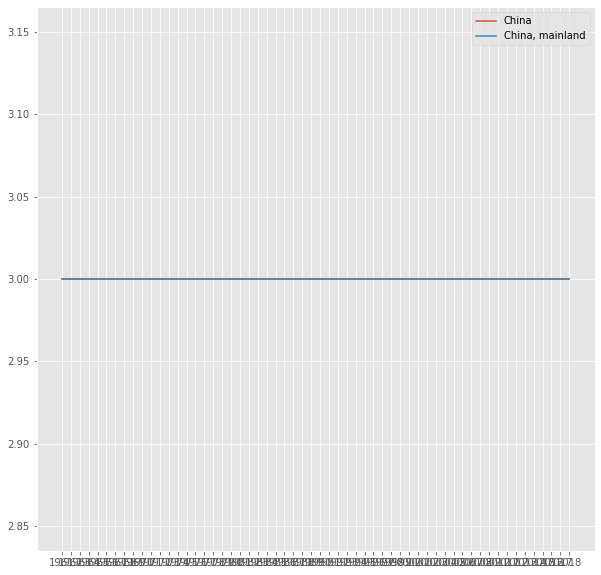

In [337]:
plt.figure(figsize=(10,10))
countries=data.area.unique()
for country in countries:
    grouped=df[df.area==country].groupby('year').count()
    years=list(grouped.index)
    wins=list(grouped.bovine)
    plt.plot(years,wins,label=country)
plt.legend()

In [180]:
import matplotlib.pyplot as plt 
#then to plot the data :
dbConnection = psycopg2.connect(
user = "dap",
password = "dap",
host = "172.20.63.221",
port = "5432",
database = "postgres")
dbConnection.set_isolation_level(0)# AUTOCOMMIT


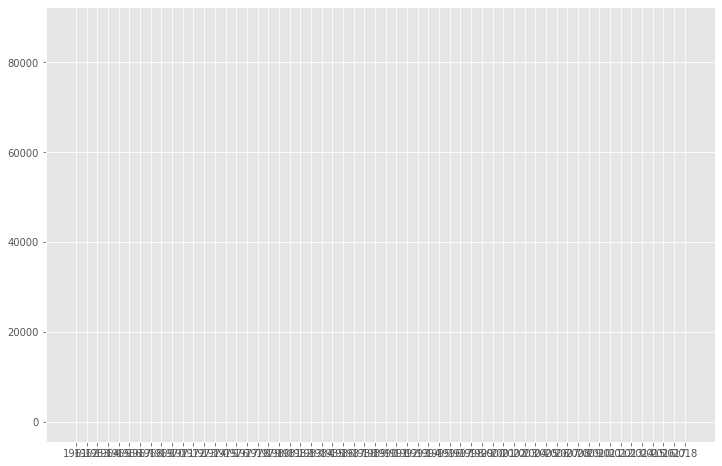

In [240]:
dbCursor = dbConnection.cursor()
sql="select year, meat_tot, area from meat_data where element='Production'order by meat_tot desc"
data=sqlio.read_sql_query(sql,dbConnection)
dbCursor.close()
test = data.groupby(['year', 'area'])
for groups, data in test :
    plt.plot(data['year'], data['meat_tot'])

In [241]:
data.head()

,year,meat_tot,area
2717,2018,258,Zimbabwe


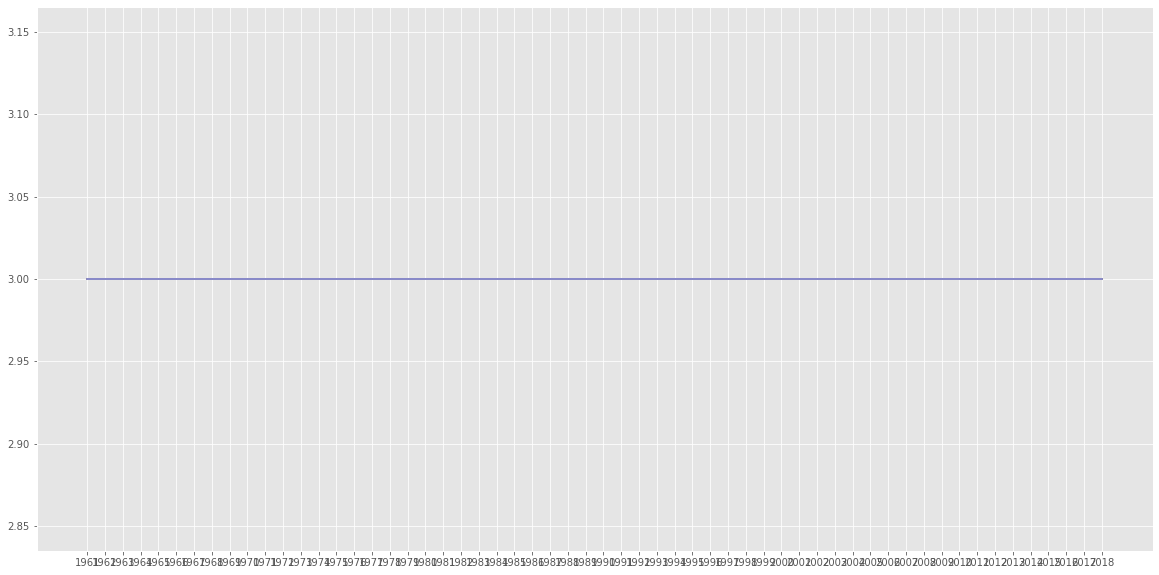

In [261]:
plt.figure(figsize=(20,10))
countries=df.area.unique()
for country in countries:
    grouped=df[df.area==country].groupby('year').count()
    years=list(grouped.index)
    wins=list(grouped.element)
    plt.plot(years,wins,label=country)
#plt.legend()

count    13920.000000
mean       232.537284
std        920.027012
min          0.000000
25%          0.000000
50%         12.000000
75%        125.000000
max      12427.000000
Name: bovine, dtype: float64

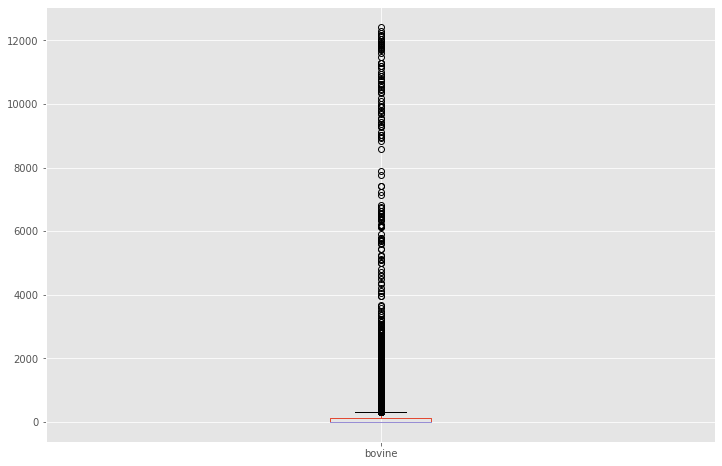

In [217]:
df.boxplot(column=['bovine'])
df['bovine'].describe()

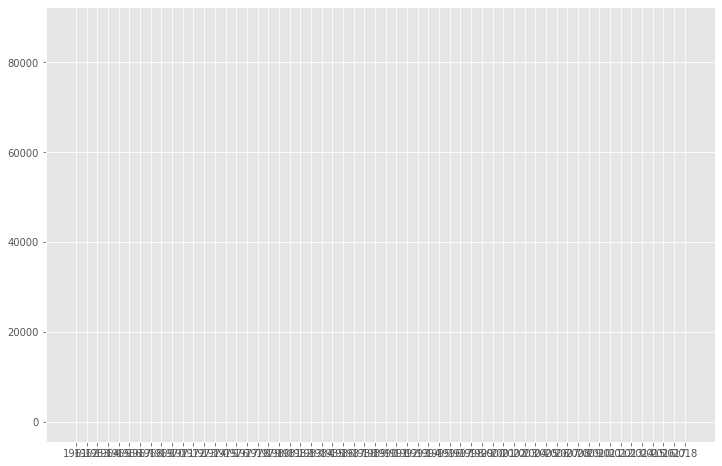

In [266]:
test = df.groupby(['year', 'area', 'element'])
for groups, data in test :
    plt.plot(data['year'], data['meat_tot'])

<AxesSubplot:ylabel='Frequency'>

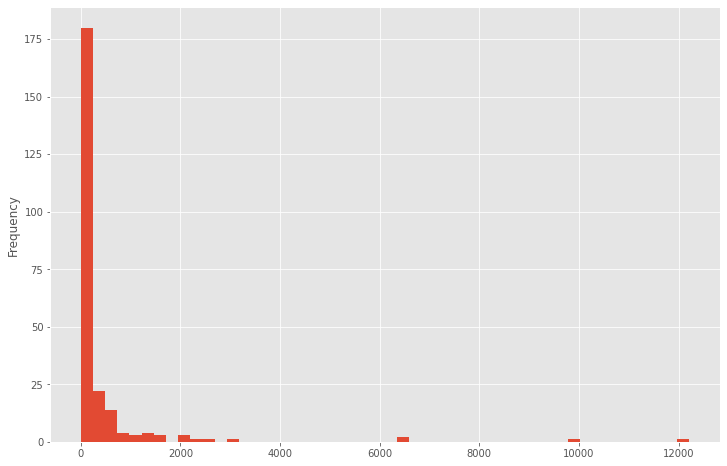

In [269]:
df.loc[df["year"]=='2018','bovine'].plot.hist(bins=50)

In [ ]:
select country,meat_tot count(*) as cnt
from list_ots
group by country
order by cnt desc
limit 5;

In [292]:
df.head

<bound method NDFrame.head of           id  year      area area_code          element  bovine  pigmeat  \
0        175  1961   Algeria         4  Export Quantity       0        0   
1        176  1961   Algeria         4  Import Quantity      24       16   
2        177  1961   Algeria         4       Production      23        0   
3        178  1962   Algeria         4  Export Quantity       0        0   
4        179  1962   Algeria         4  Import Quantity      18        7   
...      ...   ...       ...       ...              ...     ...      ...   
13915  18266  2017  Zimbabwe       181  Import Quantity       1        0   
13916  18267  2017  Zimbabwe       181       Production     108       17   
13917  18268  2018  Zimbabwe       181  Export Quantity       0        0   
13918  18269  2018  Zimbabwe       181  Import Quantity       1        0   
13919  18270  2018  Zimbabwe       181       Production     111       18   

       poultry  mutton_goat  other_meat  meat_tot  
0    

In [294]:
import plotly.express as px
df = data
df.head
fig = px.scatter(df.query("element==Production"), x="year", y="meat_tot",size="meat_tot", color="area",
                 hover_name="area", log_x=True, size_max=60)
fig.show()

UndefinedVariableError: name 'Production' is not defined

In [297]:
import pandas_alive
import pandas as pd

ModuleNotFoundError: No module named 'pandas_alive'

In [298]:
conda install pandas_alive -c conda-forge

ValueError: The python kernel does not appear to be a conda environment.  Please use ``%pip install`` instead.

In [ ]:
# Data Source: https://ourworldindata.org/grapher/population-by-country
#df = pd.read_csv('population-by-country.csv',parse_dates=['Year'])

# Rename columns
column_names = ['area','Country Code','Year','Population']
df.columns = column_names

# Only years from 1800 onwards
df = df[df['Year'].astype(int) >= 1800]

# Convert Year column to datetime
df['Year'] = pd.to_datetime(df['Year'])

display(df)

In [304]:
#reindex all table, create pivot view
pv2 = df[['element','area']]
# set the years
#pv2.columns= np.arange(1990,2018)

import seaborn as sns
palette = sns.color_palette("Paired", 10)
sns.set_palette(palette)
 
pv2.loc['meat_tot'].T.plot(alpha=0.75, rot=45)
#pv2.loc['GDP per capita (current US$)'].T.plot(alpha-0.8, rot=45)
#pv2.loc['GDP per capita (current US$)'].T.plot(alpha=0.75, rot=45)
#pv2.loc['GDP growth (annual %)'].T.plot(alpha=0.75, rot=45)

KeyError: 'meat_tot'

In [308]:
urbpop=df[['area','year','meat_tot','element']]

In [309]:
urbpopwide=urbpop.pivot(index='year',columns='area',values='meat_tot')
#the arguments to the "pivot" function do the following
## assigns the column "date" as the index 
## converts country data from rows to columns
## applies this transformation to the 'pcturb' variable.

ValueError: Index contains duplicate entries, cannot reshape

In [375]:
df2016=data[data['year']=='2016'] 

In [376]:
df2016['meat_tot']=df2016['meat_tot'].astype('int32')
df2016.head

<bound method NDFrame.head of       meat_tot  year                                area
4345        50  2016                           Mauritius
4346      1198  2016  Venezuela (Bolivarian Republic of)
4347     44643  2016            United States of America
4348      1010  2016                             Hungary
4349       216  2016                             Senegal
...        ...   ...                                 ...
4419       759  2016                            Ethiopia
4420       217  2016                             Croatia
4421      4608  2016                              Canada
4422       232  2016                           Lithuania
4423       158  2016                China, Hong Kong SAR

[79 rows x 3 columns]>

<AxesSubplot:title={'center':'Scatter Plot: Percent of Population living in an Urban Area vs. Total Population'}, xlabel='area', ylabel='meat_tot'>

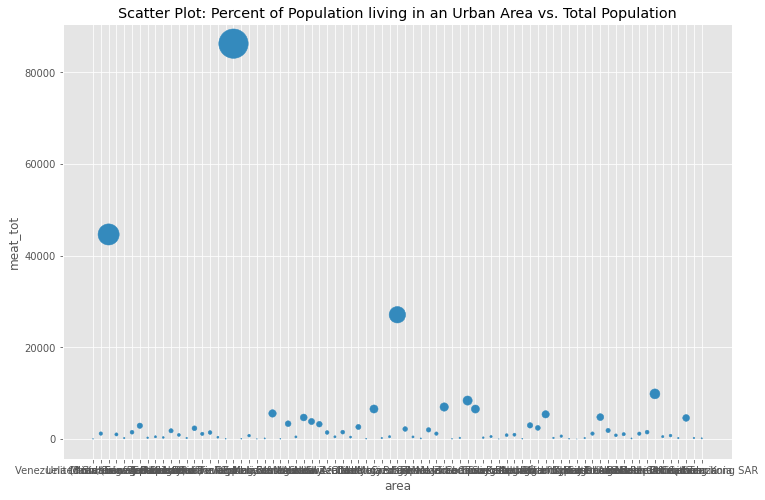

In [377]:
df2016.plot.scatter(x='area',y='meat_tot',s=df2016['meat_tot']/100,title='Scatter Plot: Percent of Population living in an Urban Area vs. Total Population')

In [355]:
data.head

<bound method NDFrame.head of           id  year      area area_code          element  bovine  pigmeat  \
0        175  1961   Algeria         4  Export Quantity       0        0   
1        176  1961   Algeria         4  Import Quantity      24       16   
2        177  1961   Algeria         4       Production      23        0   
3        178  1962   Algeria         4  Export Quantity       0        0   
4        179  1962   Algeria         4  Import Quantity      18        7   
...      ...   ...       ...       ...              ...     ...      ...   
13915  18266  2017  Zimbabwe       181  Import Quantity       1        0   
13916  18267  2017  Zimbabwe       181       Production     108       17   
13917  18268  2018  Zimbabwe       181  Export Quantity       0        0   
13918  18269  2018  Zimbabwe       181  Import Quantity       1        0   
13919  18270  2018  Zimbabwe       181       Production     111       18   

       poultry  mutton_goat  other_meat  meat_tot  
0    

In [378]:
plt.style.use('ggplot')
data.T.plot(kind='bar')
plt.ylabel('GDP per capita')

TypeError: no numeric data to plot